# Imports

In [21]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# Load dataset

In [22]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# Normalise data in the range [-1, 1]
trainX = trainX * 2 / 255
testX = testX * 2 / 255

In [23]:
train_labels = trainY
test_labels = testY

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

print("Train X dataset shape: ", np.shape(trainX))
print("Train y dataset shape: ", np.shape(trainY))
print("Test X dataset shape: ", np.shape(testX))
print("Test y dataset shape: ", np.shape(testY))

Train X dataset shape:  (60000, 28, 28)
Train y dataset shape:  (60000, 10)
Test X dataset shape:  (10000, 28, 28)
Test y dataset shape:  (10000, 10)


In [24]:
def show_examples(X, y_real, y_pred):
    fig, ax = plt.subplots(1, 5, figsize=[25, 5])

    for i, img in enumerate(X[:5]):
        ax[i].imshow(img, cmap='Greys')
        ax[i].set_title('y real: ' + str(y_real[i]) +
                        '\ny predicted: ' + str(y_pred[i]))
    plt.show()

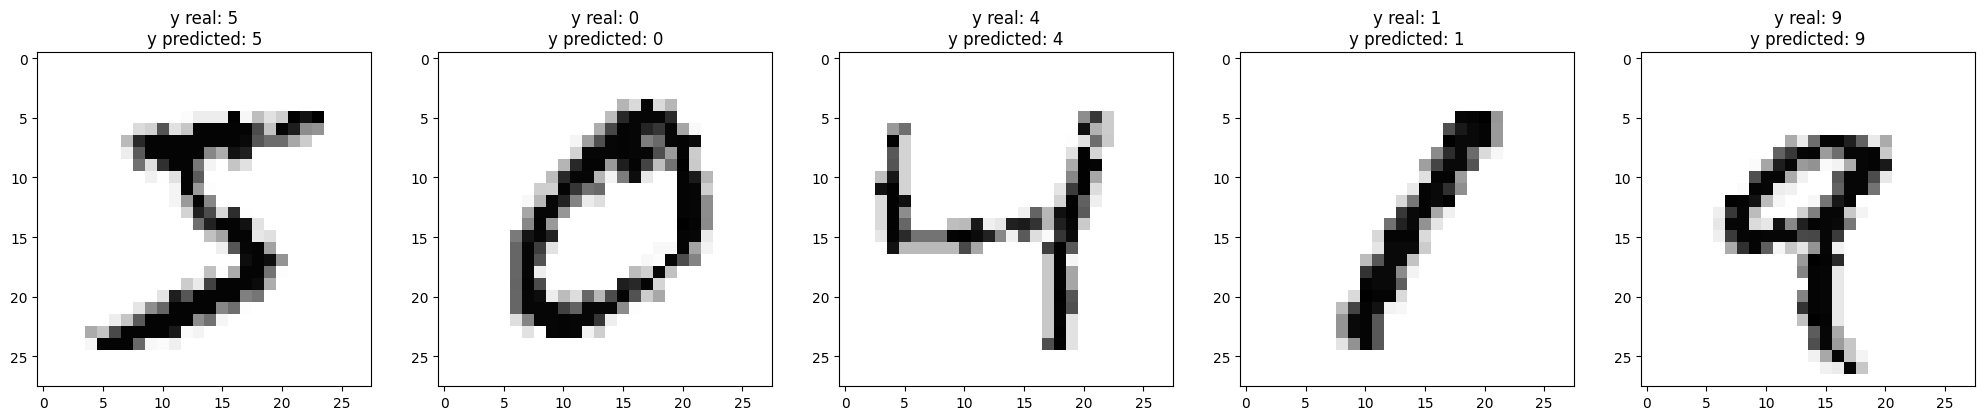

In [25]:
show_examples(trainX, train_labels, train_labels)

# Model definition

In [26]:
def create_classifier():
    # Define the model with functional API
    input = Input(shape=(28,28))

    x = Flatten()(input)
    x = Dense(28, activation='relu')(x)

    output = Dense(10, activation='softmax')(x)

    return Model(input, output)

In [27]:
model = create_classifier()
model.summary()
#plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 28)                21980     
                                                                 
 dense_3 (Dense)             (None, 10)                290       
                                                                 
Total params: 22270 (86.99 KB)
Trainable params: 22270 (86.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [29]:
history = model.fit(trainX, trainY,
                    epochs=20,
                    batch_size=128,
                    validation_data=(testX, testY),
                    verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.5041 - accuracy: 0.8618 - val_loss: 0.2822 - val_accuracy: 0.9178
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2669 - accuracy: 0.9217 - val_loss: 0.2415 - val_accuracy: 0.9261
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2258 - accuracy: 0.9345 - val_loss: 0.2131 - val_accuracy: 0.9360
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1998 - accuracy: 0.9416 - val_loss: 0.1940 - val_accuracy: 0.9412
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1811 - accuracy: 0.9471 - val_loss: 0.1851 - val_accuracy: 0.9427
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1664 - accuracy: 0.9515 - val_loss: 0.1715 - val_accuracy: 0.9494
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1529 - accuracy: 0.9550 - val_loss: 0.1642 - val_accuracy: 0.9506
Epoch 

# Evaluate the model

In [30]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

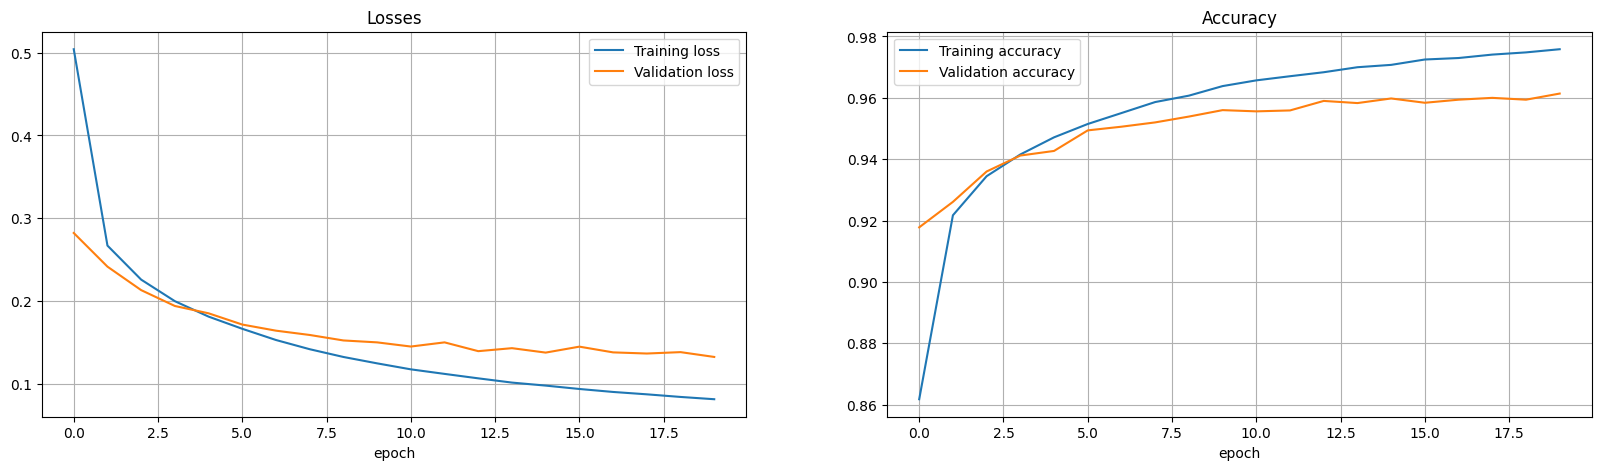

In [31]:
plot_losses(history.history)

1/1 [==============================] - 0s 22ms/step


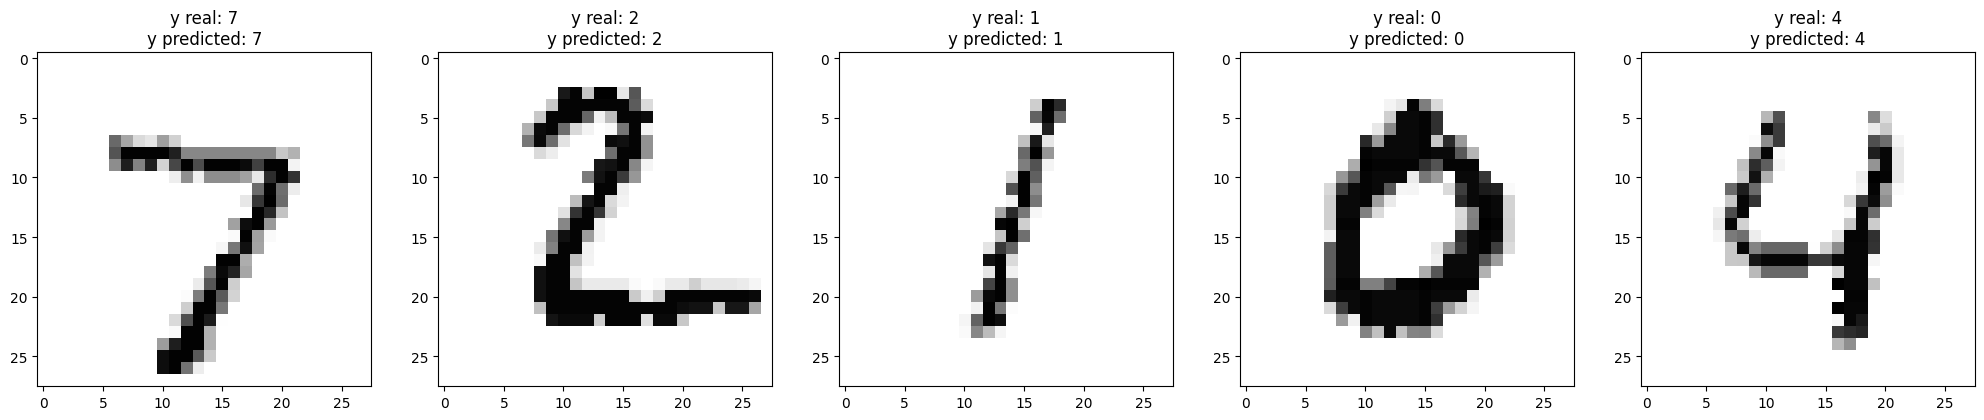

In [36]:
# Show prediction and the images predicted
y_pred = model.predict(testX[:5]).argmax(axis=-1)
show_examples(testX[:5], test_labels[:5], y_pred)

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">